Akshat Rastogi E20CSE003

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import minmax_scale
import google.colab as g
from sklearn.preprocessing import LabelEncoder

In [ ]:
g.drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/dd.csv')
data.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [ ]:
data.tail(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
510,67,Male,No,No,No,Yes,No,No,No,Yes,No,Yes,No,No,Yes,No,Negative
511,66,Male,No,No,No,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Yes,No,Negative
512,43,Male,No,No,No,No,No,No,No,No,No,No,No,No,Yes,No,Negative
513,62,Female,Yes,Yes,Yes,Yes,No,No,Yes,No,No,No,Yes,No,No,Yes,Positive
514,54,Female,Yes,Yes,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,No,Positive
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


In [ ]:
oc=data.columns
data[oc] = data[oc].apply(LabelEncoder().fit_transform)
data.head()


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,16,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,34,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,17,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,21,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,36,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
data['Age']=minmax_scale(data['Age'])
data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,0.32,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,0.68,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,0.34,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,0.42,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,0.72,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
x=data.iloc[:,0:-1]
print(x)
X=x.to_numpy()

      Age  Gender  Polyuria  ...  muscle stiffness  Alopecia  Obesity
0    0.32       1         0  ...                 1         1        1
1    0.68       1         0  ...                 0         1        0
2    0.34       1         1  ...                 1         1        0
3    0.42       1         0  ...                 0         0        0
4    0.72       1         1  ...                 1         1        1
..    ...     ...       ...  ...               ...       ...      ...
515  0.30       0         1  ...                 0         0        0
516  0.48       0         1  ...                 0         0        0
517  0.68       0         1  ...                 1         0        1
518  0.16       0         0  ...                 0         1        0
519  0.36       1         0  ...                 0         0        0

[520 rows x 16 columns]


In [ ]:
y=data.iloc[:,-1]
print(y)
Y=y.to_numpy()


0      1
1      1
2      1
3      1
4      1
      ..
515    1
516    1
517    1
518    0
519    0
Name: class, Length: 520, dtype: int64


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy",accuracy)

Accuracy 91.34615384615384


In [ ]:
confusion_matrix(y_test, y_pred)

array([[35,  3],
       [ 6, 60]])

In [ ]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.85365854, 0.95238095]),
 array([0.92105263, 0.90909091]),
 array([0.88607595, 0.93023256]),
 array([38, 66]))

In [ ]:
values=[]
z=0.4
for i in range(4):
  x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=z,random_state=1)
  model.fit(x_train,y_train)
  y_pred=model.predict(x_test)
  a=accuracy_score(y_test,y_pred)*100
  values.append(a)
  z-=0.1


[91.82692307692307, 91.71974522292994, 91.42857142857143, 88.67924528301887]


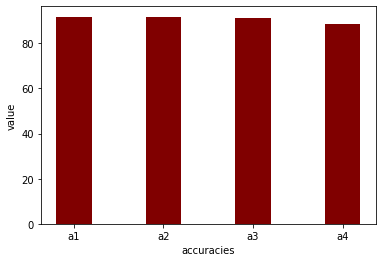

In [ ]:
from collections import namedtuple
dataset=['a1','a2','a3','a4']
print(values)
plt.bar(dataset, values, color ='maroon',
        width = 0.4)
plt.xlabel("accuracies")
plt.ylabel("value")
plt.show()
